In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np

In [2]:
# ImageDataGenerator ile veri yükleme ve ön işleme
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('data/train', target_size=(150, 150), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory('data/validation', target_size=(150, 150), batch_size=32, class_mode='categorical')


Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.


In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(36, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/home/hta/anaconda3/envs/ai/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-07-22 10:08:54.795036: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-22 10:08:54.795822: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to downlo

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │        18,468 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,471,076 (13.24 MB)

 Trainable params: 3,471,076 (13.24 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
history = model.fit(train_generator, epochs=150, validation_data=val_generator)

Epoch 1/150


/home/hta/anaconda3/envs/ai/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/home/hta/anaconda3/envs/ai/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
2024-07-22 10:09:23.234303: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-07-22 10:09:30.884012: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


98/98 ━━━━━━━━━━━━━━━━━━━━ 313s 3s/step - accuracy: 0.0377 - loss: 3.5300 - val_accuracy: 0.1140 - val_loss: 3.0092
Epoch 2/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.0835 - loss: 3.1386 - val_accuracy: 0.1966 - val_loss: 2.7608
Epoch 3/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.1183 - loss: 2.9357 - val_accuracy: 0.3020 - val_loss: 2.3969
Epoch 4/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.1799 - loss: 2.6638 - val_accuracy: 0.3419 - val_loss: 2.0932
Epoch 5/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.1986 - loss: 2.5563 - val_accuracy: 0.3875 - val_loss: 1.9611
Epoch 6/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.2575 - loss: 2.4130 - val_accuracy: 0.4359 - val_loss: 1.8105
Epoch 7/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.2525 - loss: 2.4225 - val_accuracy: 0.4501 - val_loss: 1.7002
Epoch 8/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.2910 - loss: 2.2141 - val_accuracy: 0.4245 - val_l

2024-07-22 10:36:42.240425: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-07-22 10:36:43.845146: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


98/98 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.3001 - loss: 2.2714 - val_accuracy: 0.5271 - val_loss: 1.5168
Epoch 11/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.3351 - loss: 2.1481 - val_accuracy: 0.5185 - val_loss: 1.5110
Epoch 12/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.3473 - loss: 2.0831 - val_accuracy: 0.5356 - val_loss: 1.5163
Epoch 13/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.3667 - loss: 2.0650 - val_accuracy: 0.5185 - val_loss: 1.4410
Epoch 14/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.3562 - loss: 2.0351 - val_accuracy: 0.5356 - val_loss: 1.4772
Epoch 15/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.3702 - loss: 2.0414 - val_accuracy: 0.5356 - val_loss: 1.4449
Epoch 16/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.3963 - loss: 1.9786 - val_accuracy: 0.5214 - val_loss: 1.3342
Epoch 17/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.3902 - loss: 1.9649 - val_accuracy: 0.5840 

2024-07-22 11:22:02.202661: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-07-22 11:22:03.514506: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


98/98 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.4985 - loss: 1.5913 - val_accuracy: 0.6809 - val_loss: 1.0258
Epoch 29/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.5206 - loss: 1.5640 - val_accuracy: 0.6524 - val_loss: 1.1355
Epoch 30/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.5126 - loss: 1.5108 - val_accuracy: 0.7322 - val_loss: 0.8910
Epoch 31/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.5384 - loss: 1.5439 - val_accuracy: 0.7293 - val_loss: 0.9023
Epoch 32/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.5146 - loss: 1.5575 - val_accuracy: 0.7806 - val_loss: 0.7829
Epoch 33/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.5272 - loss: 1.5105 - val_accuracy: 0.7493 - val_loss: 0.7855
Epoch 34/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.5363 - loss: 1.5414 - val_accuracy: 0.7835 - val_loss: 0.7333
Epoch 35/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.5453 - loss: 1.4525 - val_accuracy: 0.7179 

2024-07-22 12:02:27.134911: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-07-22 12:02:28.451378: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


98/98 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.5829 - loss: 1.3370 - val_accuracy: 0.8348 - val_loss: 0.6516
Epoch 45/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.6115 - loss: 1.2139 - val_accuracy: 0.8205 - val_loss: 0.6360
Epoch 46/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.6213 - loss: 1.2576 - val_accuracy: 0.8205 - val_loss: 0.6717
Epoch 47/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.6058 - loss: 1.2562 - val_accuracy: 0.8319 - val_loss: 0.6075
Epoch 48/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.5922 - loss: 1.2761 - val_accuracy: 0.8262 - val_loss: 0.6400
Epoch 49/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.5994 - loss: 1.2528 - val_accuracy: 0.8319 - val_loss: 0.5815
Epoch 50/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.6261 - loss: 1.2058 - val_accuracy: 0.8205 - val_loss: 0.5626
Epoch 51/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.6130 - loss: 1.2037 - val_accuracy: 0.8177 

2024-07-22 16:22:58.180493: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 5 of 8
2024-07-22 16:23:02.257309: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


98/98 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.7798 - loss: 0.6655 - val_accuracy: 0.9117 - val_loss: 0.2626
Epoch 149/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.7914 - loss: 0.6209 - val_accuracy: 0.9117 - val_loss: 0.3394
Epoch 150/150
98/98 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.7851 - loss: 0.6291 - val_accuracy: 0.8803 - val_loss: 0.4845


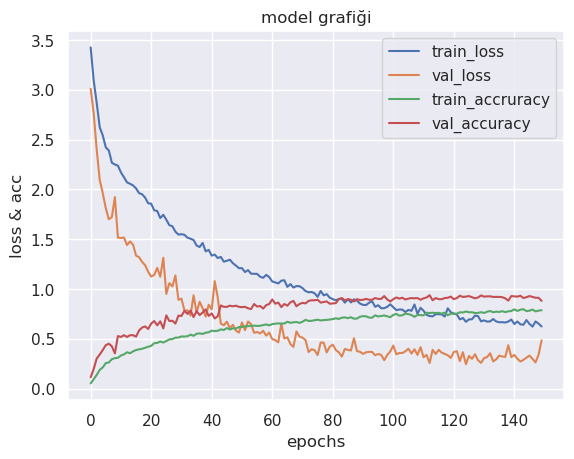

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
epochs=150
plt.plot(np.arange(0,epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0,epochs), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,epochs), history.history["accuracy"], label="train_accruracy")
plt.plot(np.arange(0,epochs), history.history["val_accuracy"], label="val_accuracy")
plt.title("model grafiği")
plt.xlabel("epochs")
plt.ylabel("loss & acc")
plt.legend()
plt.show()

In [8]:
model.save("best.keras")

In [9]:
from PIL import Image

In [13]:
model = tf.keras.models.load_model('best.keras')

In [14]:
def prepare_image(image_path):
    img = Image.open(image_path).resize((150, 150))  # Modelin beklediği boyut
    img = img.convert('RGB')  # Renkli formatta olmalı
    img_array = np.array(img) / 255.0  # Normalizasyon
    img_array = np.expand_dims(img_array, axis=0)  # Batch boyutunu ekleyin
    return img_array

In [15]:
def predict_image(image_path):
    img_array = prepare_image(image_path)
    predictions = model.predict(img_array)
    return predictions

In [16]:
image_path = '1.jpg'
predictions = predict_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


In [17]:
class_names = [
    'apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 
    'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 
    'garlic', 'ginger', 'grapes', 'jalapeno', 'kiwi', 'lemon', 'lettuce', 
    'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 
    'pomegranate', 'potato', 'radish', 'soy beans', 'spinach', 'sweetcorn', 
    'sweet potato', 'tomato', 'turnip', 'watermelon'
]

In [18]:
def get_prediction_result(predictions):
    predicted_class = np.argmax(predictions[0])
    predicted_label = class_names[predicted_class]
    confidence = predictions[0][predicted_class] * 100
    return predicted_label, confidence

In [19]:
predicted_label, confidence = get_prediction_result(predictions)

In [20]:
print(f"Tahmin: {predicted_label}")
print(f"Olasılık: %{confidence:.2f}")

Tahmin: pineapple
Olasılık: %100.00
